In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [21]:
# Step 1 - Import dataframe
project = pd.read_pickle(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/02 Data/Prepared Data/mega_dataframe.pkl')

MemoryError: 

In [13]:
# Step 2 - Consider PII data. Removing Surname column
project = project.drop(columns = ['Surname'])

In [14]:
# Step 3 - Create region column
region_map = {
    # Northeast
    "Maine": "Northeast", "New Hampshire": "Northeast", "Vermont": "Northeast",
    "Massachusetts": "Northeast", "Rhode Island": "Northeast", "Connecticut": "Northeast",
    "New York": "Northeast", "Pennsylvania": "Northeast", "New Jersey": "Northeast",
    # Midwest
    "Wisconsin": "Midwest", "Michigan": "Midwest", "Illinois": "Midwest", "Indiana": "Midwest",
    "Ohio": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",
    "Nebraska": "Midwest", "Kansas": "Midwest", "Minnesota": "Midwest",
    "Iowa": "Midwest", "Missouri": "Midwest",
    # South
    "Delaware": "South", "Maryland": "South", "District of Columbia": "South", "DC": "South",
    "Virginia": "South", "West Virginia": "South", "North Carolina": "South", "South Carolina": "South",
    "Georgia": "South", "Florida": "South", "Kentucky": "South", "Tennessee": "South",
    "Mississippi": "South", "Alabama": "South", "Oklahoma": "South", "Texas": "South",
    "Arkansas": "South", "Louisiana": "South",
    # West
    "Idaho": "West", "Montana": "West", "Wyoming": "West", "Nevada": "West",
    "Utah": "West", "Colorado": "West", "Arizona": "West", "New Mexico": "West",
    "Alaska": "West", "Washington": "West", "Oregon": "West", "California": "West", "Hawaii": "West",}
project["Region"] = project["STATE"].map(region_map)

NameError: name 'project' is not defined

In [15]:
project[["STATE", "Region"]].head(10)  

,STATE,Region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
5,Alabama,South
6,Alabama,South
7,Alabama,South
8,Alabama,South
9,Alabama,South


In [24]:
# Spending habits between the different U.S. regions. Create spending flag because it wasn't saved in dataset
project.loc[project['avg_price'] < 10, 'spending_flag'] = 'Low spender'
project.loc[project['avg_price'] >= 10, 'spending_flag'] = 'High spender'
project.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,spending_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Low spender
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,Low spender
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,Low spender
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,South,Low spender


In [27]:
spending_by_region = project.groupby(['Region', 'spending_flag']).size().reset_index(name='Count')
print(spending_by_region)

      Region spending_flag  Count
0    Midwest  High spender   1345
1    Midwest   Low spender  50549
2  Northeast  High spender   1083
3  Northeast   Low spender  39752
4      South  High spender   1569
5      South   Low spender  60915
6       West  High spender   1360
7       West   Low spender  49636


In [ ]:
# There is no difference in spending habits. There are more low spender customers in general

In [38]:
# Export dataset
project.to_pickle(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/02 Data/Prepared Data/project2.pkl')

In [2]:
# Import dataframe
project = pd.read_pickle(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/02 Data/Prepared Data/project2.pkl')

KeyboardInterrupt: 

In [ ]:
# Step 4 - Exclusion flag for low-activity customers

In [3]:
project['exclusion_flag'] = project['max_order'] < 5

In [5]:
project['exclusion_flag'].value_counts()

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [6]:
# Excluding low-activity customers
high_activity = project[project['exclusion_flag'] == False]

In [8]:
high_activity[['exclusion_flag']].head(10)  

,exclusion_flag
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [9]:
# Export frame with high-activity customers
high_activity.to_pickle(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/02 Data/Prepared Data/high_activity.pkl')

In [2]:
# Import dataframe
high_activity = pd.read_pickle(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/02 Data/Prepared Data/high_activity.pkl')

In [3]:
# Sampling data due to memory error
np.random.seed(4)
dev = np.random.rand(len(high_activity)) <= 0.8

In [4]:
# Store 80% of sample
ha_80 = high_activity[dev]

In [5]:
# Store 20% of sample
ha_20 = high_activity[~dev]

In [6]:
# Step 5- Customer profiling
def profile(row):

    if (row['n_dependants'] == 0
        and row['Age'] <= 25
        and row['income'] >= 20000
        and row['department_id'] in (1, 5, 19)):
        return 'Single young adult'

    if (row['n_dependants'] == 0
        and row['Age'] <= 40
        and row['income'] >= 50000
        and row['department_id'] in (11, 13, 14)):
        return 'Young professional'

    if (row['n_dependants'] >= 1
        and row['Age'] <= 40
        and row['income'] >= 50000
        and row['department_id'] != 18):
        return 'Young parent'

    if (row['n_dependants'] >= 1
        and row['Age'] >= 70
        and row['income'] >= 300000
        and row['department_id'] in (11, 13, 14)):
        return 'Retired customer'
    else: return 'Other'

In [7]:
ha_20['profile'] = ha_20.apply(profile, axis=1)

C:\Users\ab-fv\AppData\Local\Temp\ipykernel_12640\2698020230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ha_20['profile'] = ha_20.apply(profile, axis=1)


<Axes: xlabel='profile'>

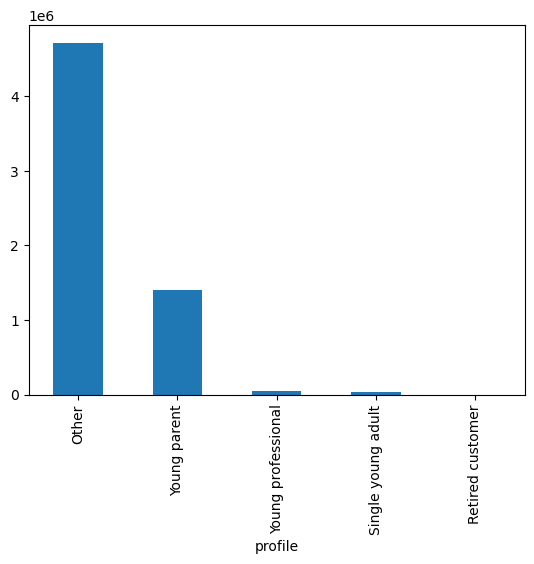

In [8]:
# Step 6 - Visualization of profiles
ha_20['profile'].value_counts().plot.bar()

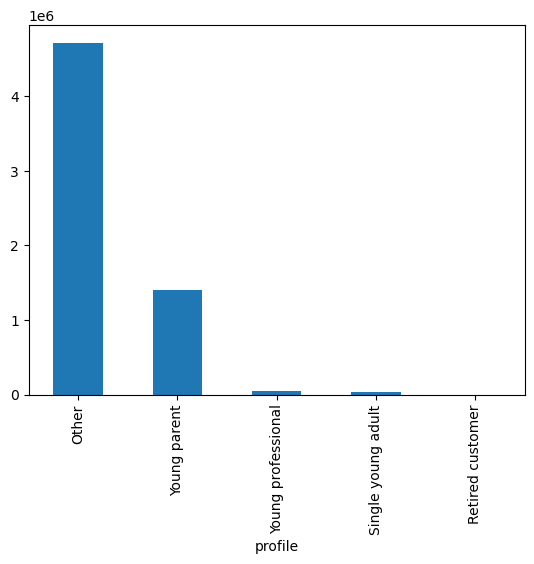

In [10]:
# Save bar chart
bar = ha_20['profile'].value_counts().plot.bar()

In [11]:
# Step 7 Aggregate
ha_20.groupby('profile').agg({'days_since_prior_order': ['mean', 'min', 'max']} , {'prices': ['mean', 'min', 'max']})

days_since_prior_order           
                                     mean  min   max
profile                                             
Other                           10.833490  0.0  30.0
Retired customer                10.446602  0.0  30.0
Single young adult              11.258697  0.0  30.0
Young parent                    10.711024  0.0  30.0
Young professional              10.922980  0.0  30.0

In [22]:
# Re-do step 3
region_map = {
    # Northeast
    "Maine": "Northeast", "New Hampshire": "Northeast", "Vermont": "Northeast",
    "Massachusetts": "Northeast", "Rhode Island": "Northeast", "Connecticut": "Northeast",
    "New York": "Northeast", "Pennsylvania": "Northeast", "New Jersey": "Northeast",
    # Midwest
    "Wisconsin": "Midwest", "Michigan": "Midwest", "Illinois": "Midwest", "Indiana": "Midwest",
    "Ohio": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",
    "Nebraska": "Midwest", "Kansas": "Midwest", "Minnesota": "Midwest",
    "Iowa": "Midwest", "Missouri": "Midwest",
    # South
    "Delaware": "South", "Maryland": "South", "District of Columbia": "South", "DC": "South",
    "Virginia": "South", "West Virginia": "South", "North Carolina": "South", "South Carolina": "South",
    "Georgia": "South", "Florida": "South", "Kentucky": "South", "Tennessee": "South",
    "Mississippi": "South", "Alabama": "South", "Oklahoma": "South", "Texas": "South",
    "Arkansas": "South", "Louisiana": "South",
    # West
    "Idaho": "West", "Montana": "West", "Wyoming": "West", "Nevada": "West",
    "Utah": "West", "Colorado": "West", "Arizona": "West", "New Mexico": "West",
    "Alaska": "West", "Washington": "West", "Oregon": "West", "California": "West", "Hawaii": "West",}
ha_20["Region"] = ha_20["STATE"].map(region_map)

C:\Users\ab-fv\AppData\Local\Temp\ipykernel_12640\2237514586.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ha_20["Region"] = ha_20["STATE"].map(region_map)


In [23]:
# Checking
ha_20[["STATE", "Region"]].head(10)  

,STATE,Region
0,Alabama,South
2,Alabama,South
6,Alabama,South
12,Alabama,South
13,Alabama,South
19,Alabama,South
21,Alabama,South
23,Alabama,South
31,Alabama,South
50,Alabama,South


In [28]:
# Step 8 - Compare profiles
profile_map = (ha_20.groupby('profile', as_index=False).agg(
          regions = ('Region', lambda s: sorted(s.unique())),   
          departments = ('department_id', lambda s: sorted(s.unique()))))

profile_map.head()

,profile,regions,departments
0,Other,"[Midwest, Northeast, South, West]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Retired customer,"[Midwest, Northeast, South, West]","[11, 13, 14]"
2,Single young adult,"[Midwest, Northeast, South, West]","[1, 5, 19]"
3,Young parent,"[Midwest, Northeast, South, West]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,Young professional,"[Midwest, Northeast, South, West]","[11, 13, 14]"


In [ ]:
# Explanation: Customers with profiles "Other", and "Young parent" buy products for more depaartments
  # Retired customers and young professionals shop from the same departments

In [ ]:
# Step 9 - Charts

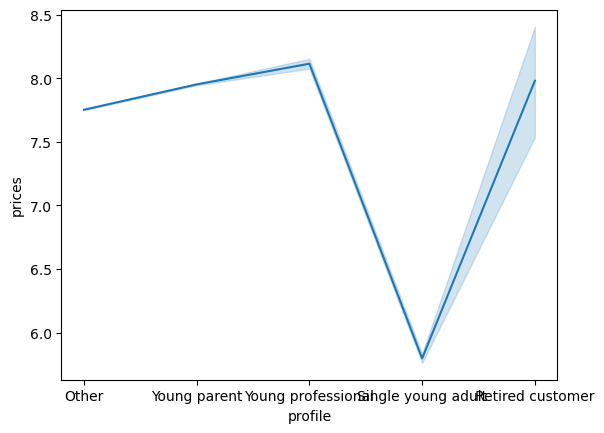

In [36]:
# Expenditure per customer profile
exp_profile = sns.lineplot(data = ha_20, x = 'profile',y = 'prices')

In [37]:
# Export line chart
exp_profile.figure.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/04 Analysis/Visualizations/exp_profile.png')

<Axes: xlabel='profile', ylabel='department_id'>

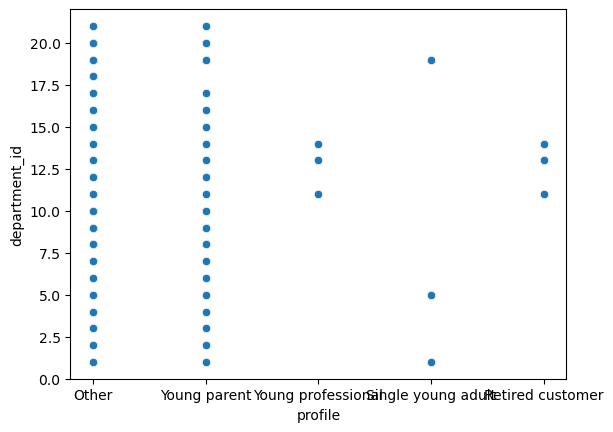

In [39]:
# Link profile and department
sns.scatterplot(x = 'profile', y = 'department_id',data = ha_20)

In [41]:
# Export scatterplot
plt.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/04 Analysis/Visualizations/dept_profile.png')

<Figure size 640x480 with 0 Axes>

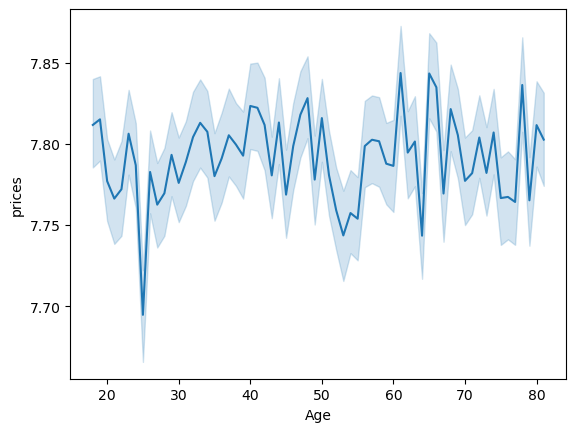

In [44]:
# Expenditure per age
exp_age = sns.lineplot(data = ha_20, x = 'Age',y = 'prices')

In [45]:
# Export line
exp_age.figure.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Instacart Basket Analysis/04 Analysis/Visualizations/exp_age.png')